In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
test = 1.0*(u.erg/(u.g * u.K))
print(test.to(u.MJ/(u.kg * u.K)))


test2 = 1.0*(u.dyn/(u.cm**2))
print(test2.to(u.GPa))

mJtoGrams = u.jupiterMass.to(u.g)

rJtorSun = u.jupiterRad.to(u.solRad)
rJtoCm = u.jupiterRad.to(u.cm)

1e-10 MJ / (K kg)
1e-10 GPa


In [3]:
#HHE_2021_Trho = CMStable("./2021_chabrier+_tables/TABLEEOS_2021_Trho_Y0292_v1")
#HHE_2019_Trho = CMStable("./2021_chabrier+_tables/TABLEEOS_HHE_Trho_IVL_Y0.275_v1")

CMS19_H_Trho = meos.CMStable("./2021_chabrier+_tables/TABLE_H_Trho_v1")
CMS19_H_TP = meos.CMStable("./2021_chabrier+_tables/TABLE_H_TP_v1")

CMS19_He_Trho = meos.CMStable("./2021_chabrier+_tables/TABLE_HE_Trho_v1")
CMS19_He_TP = meos.CMStable("./2021_chabrier+_tables/TABLE_HE_TP_v1")

In [4]:
SCVH_H_TP = meos.SCVHtable("./1995_SCVH/h_tab_i.dat")
SCVH_He_TP = meos.SCVHtable("./1995_SCVH/he_tab_i.dat")

In [5]:
MESA_SCVH_H_Trho = meos.MESAtable('MESA_SCVH/eosDT_data/mesa-eosDT_00z100x.data')
MESA_SCVH_He_Trho = meos.MESAtable('MESA_SCVH/eosDT_data/mesa-eosDT_00z00x.data')

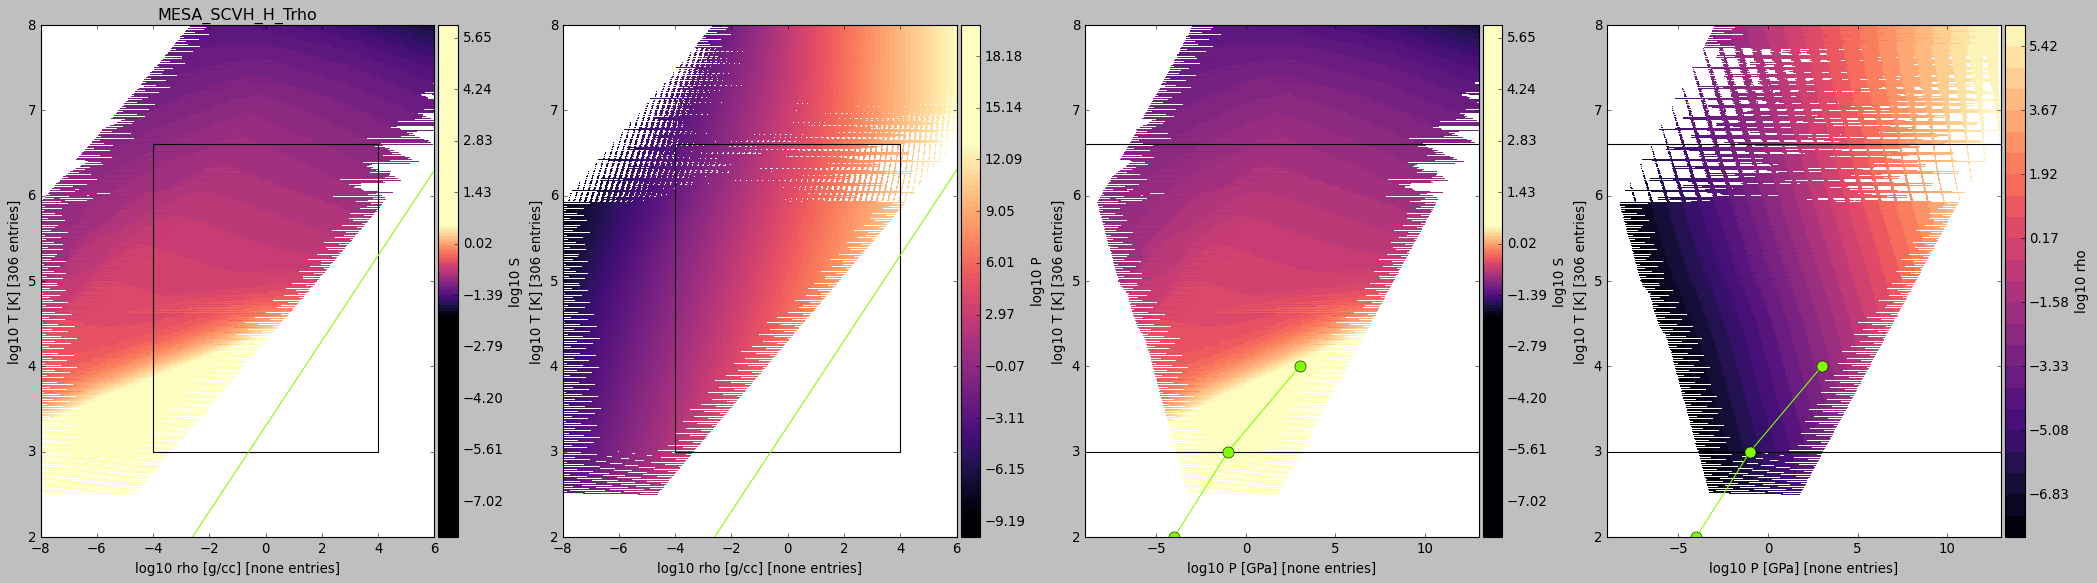

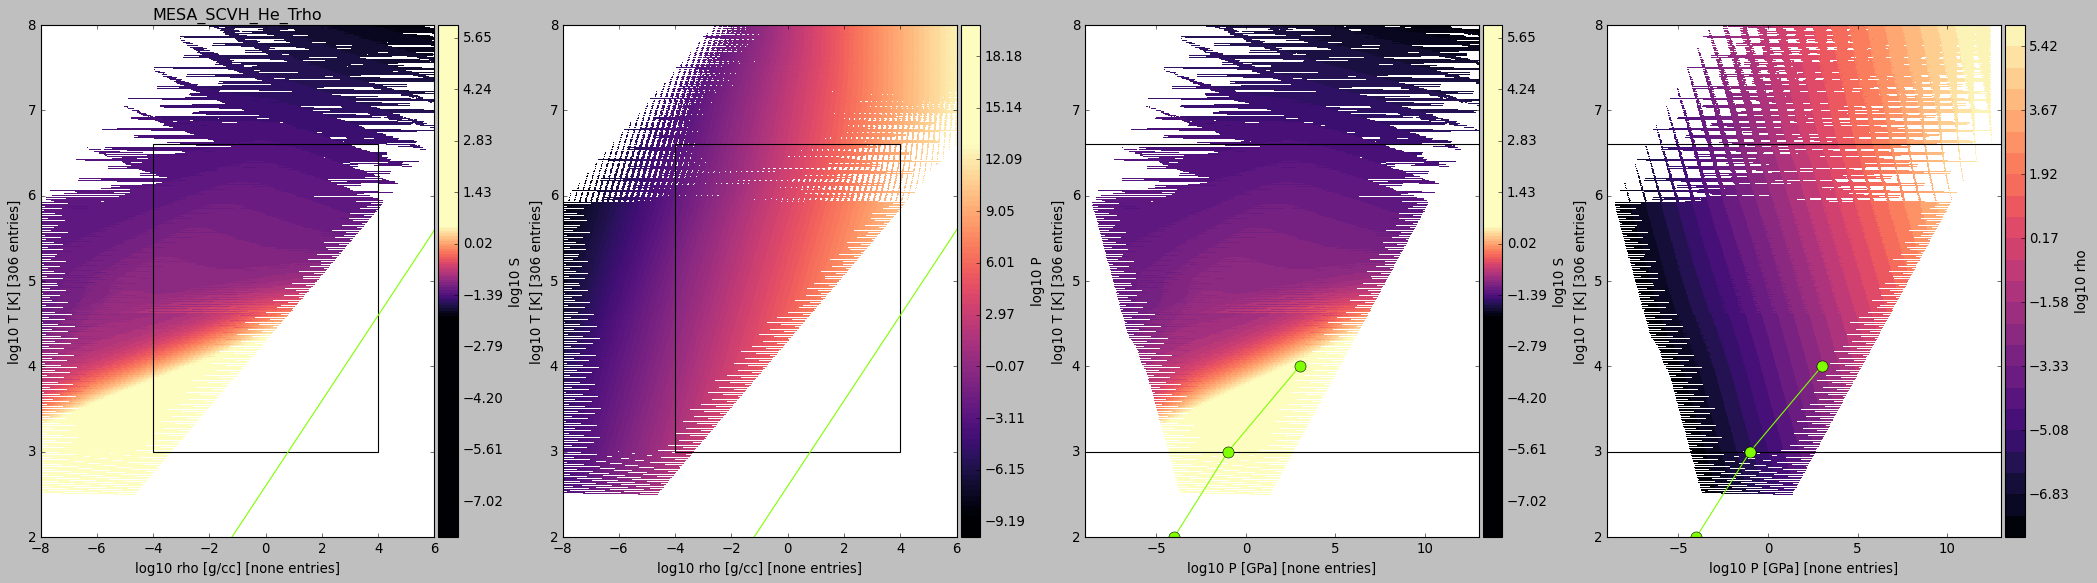

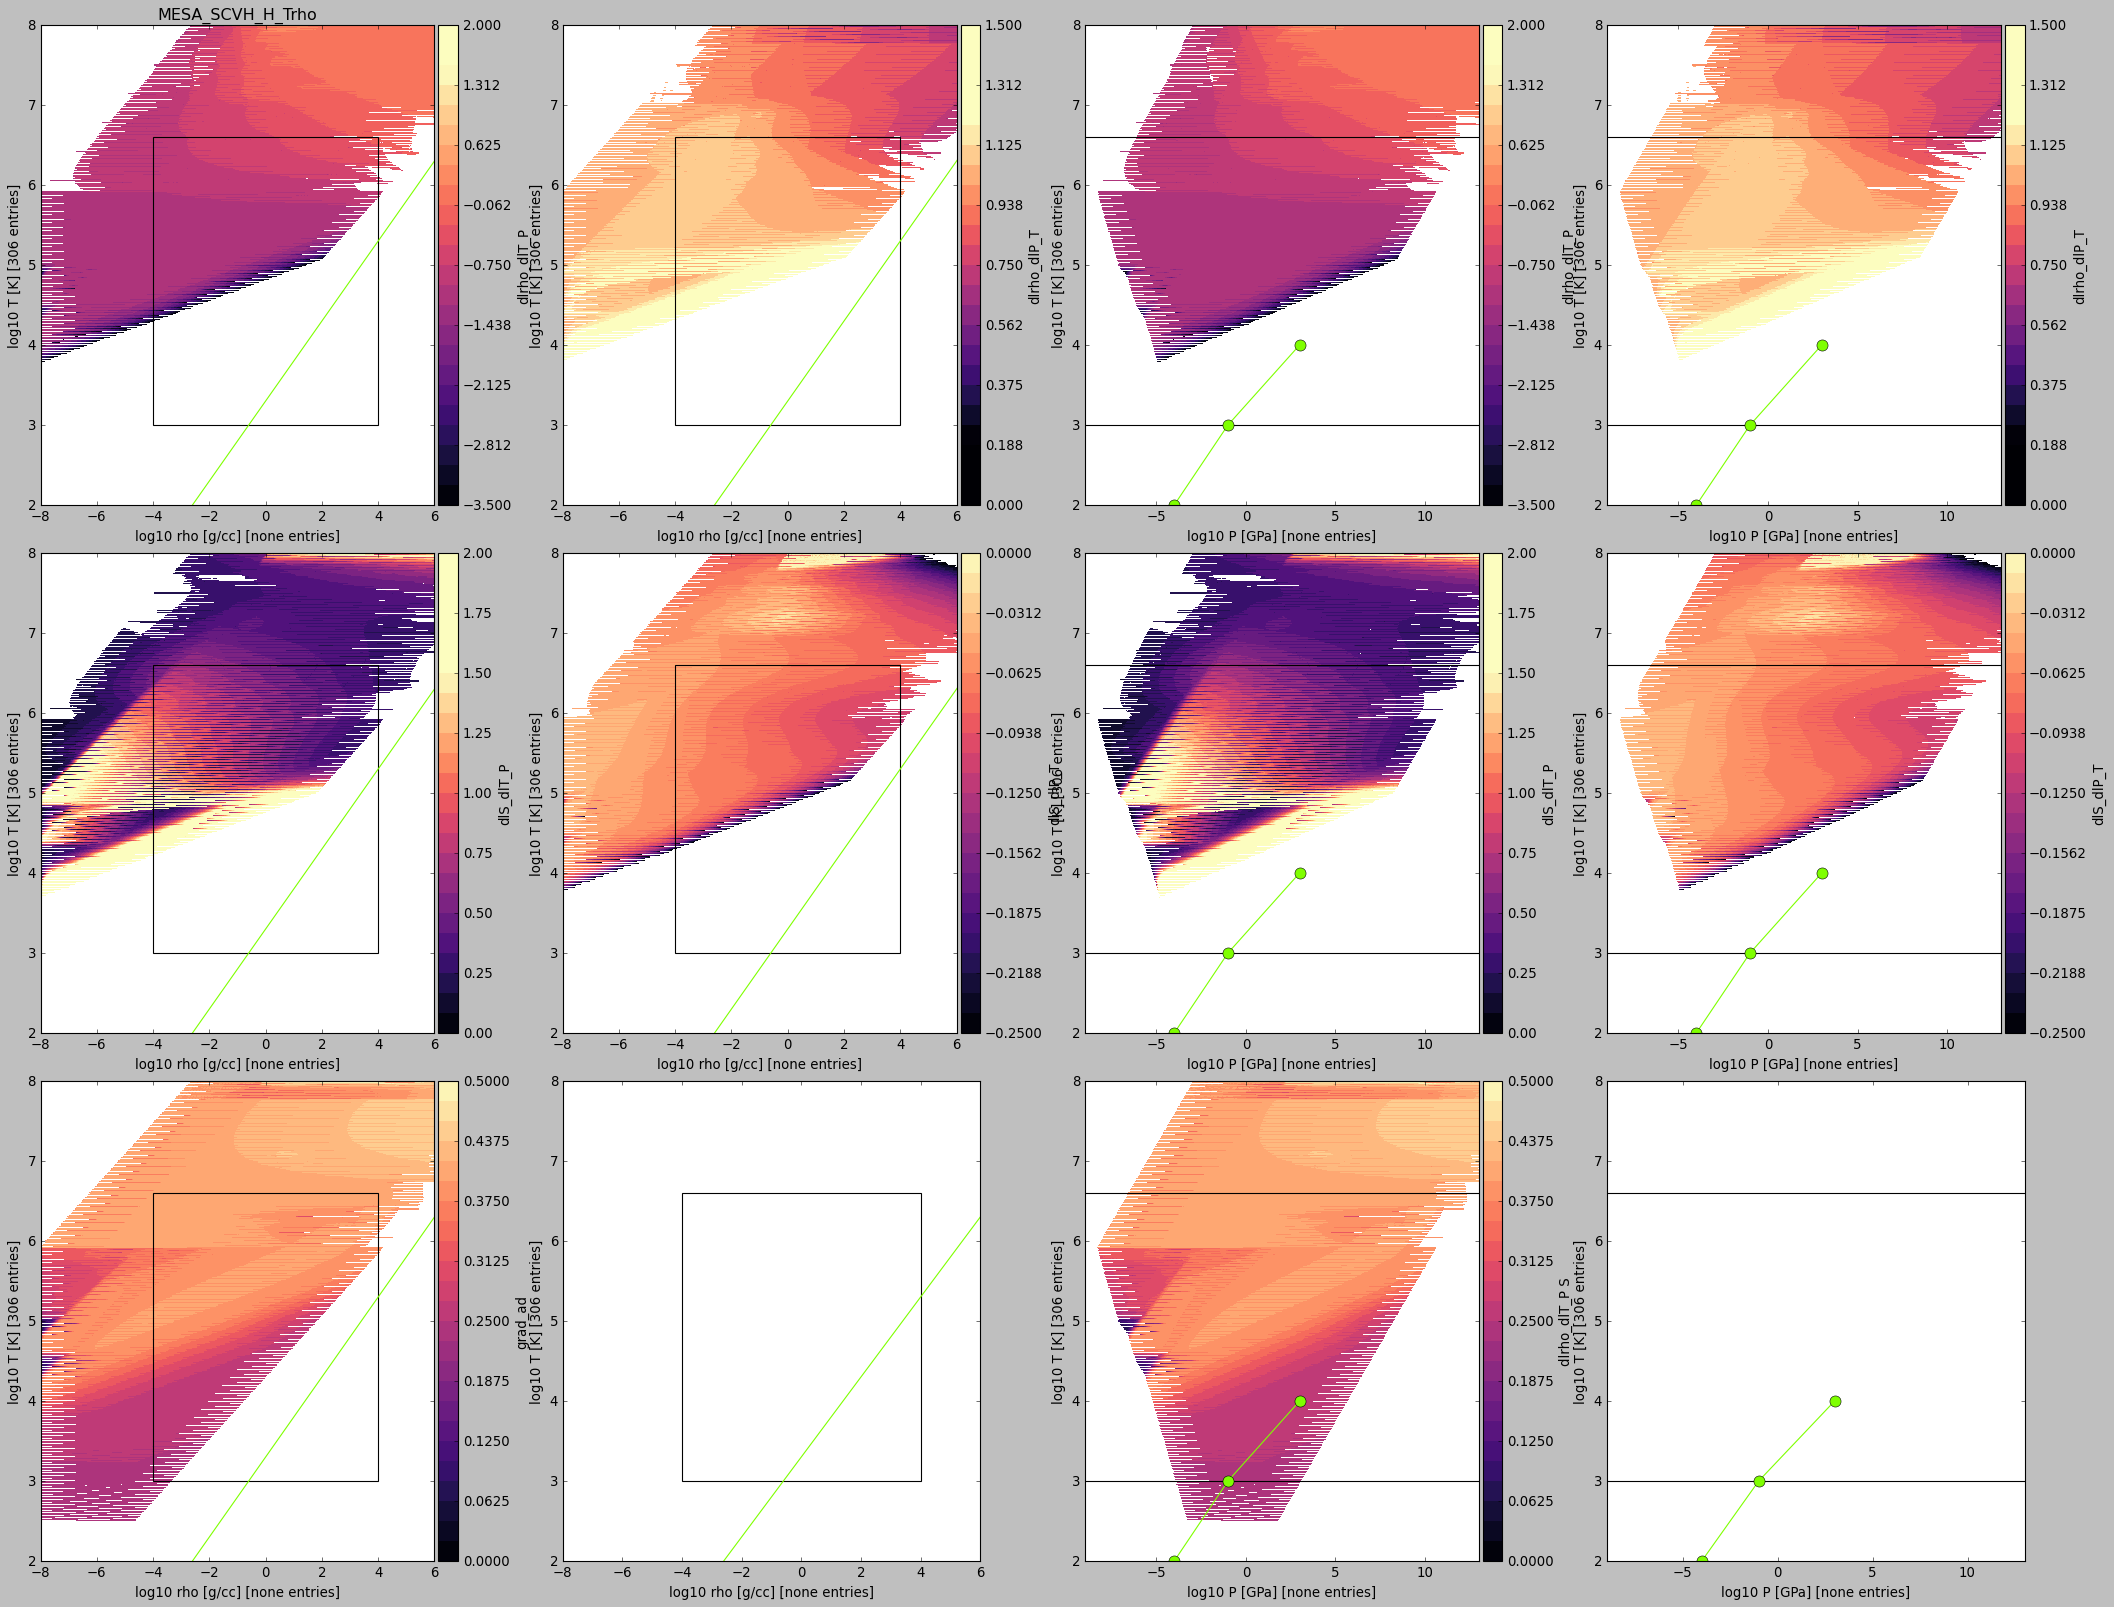

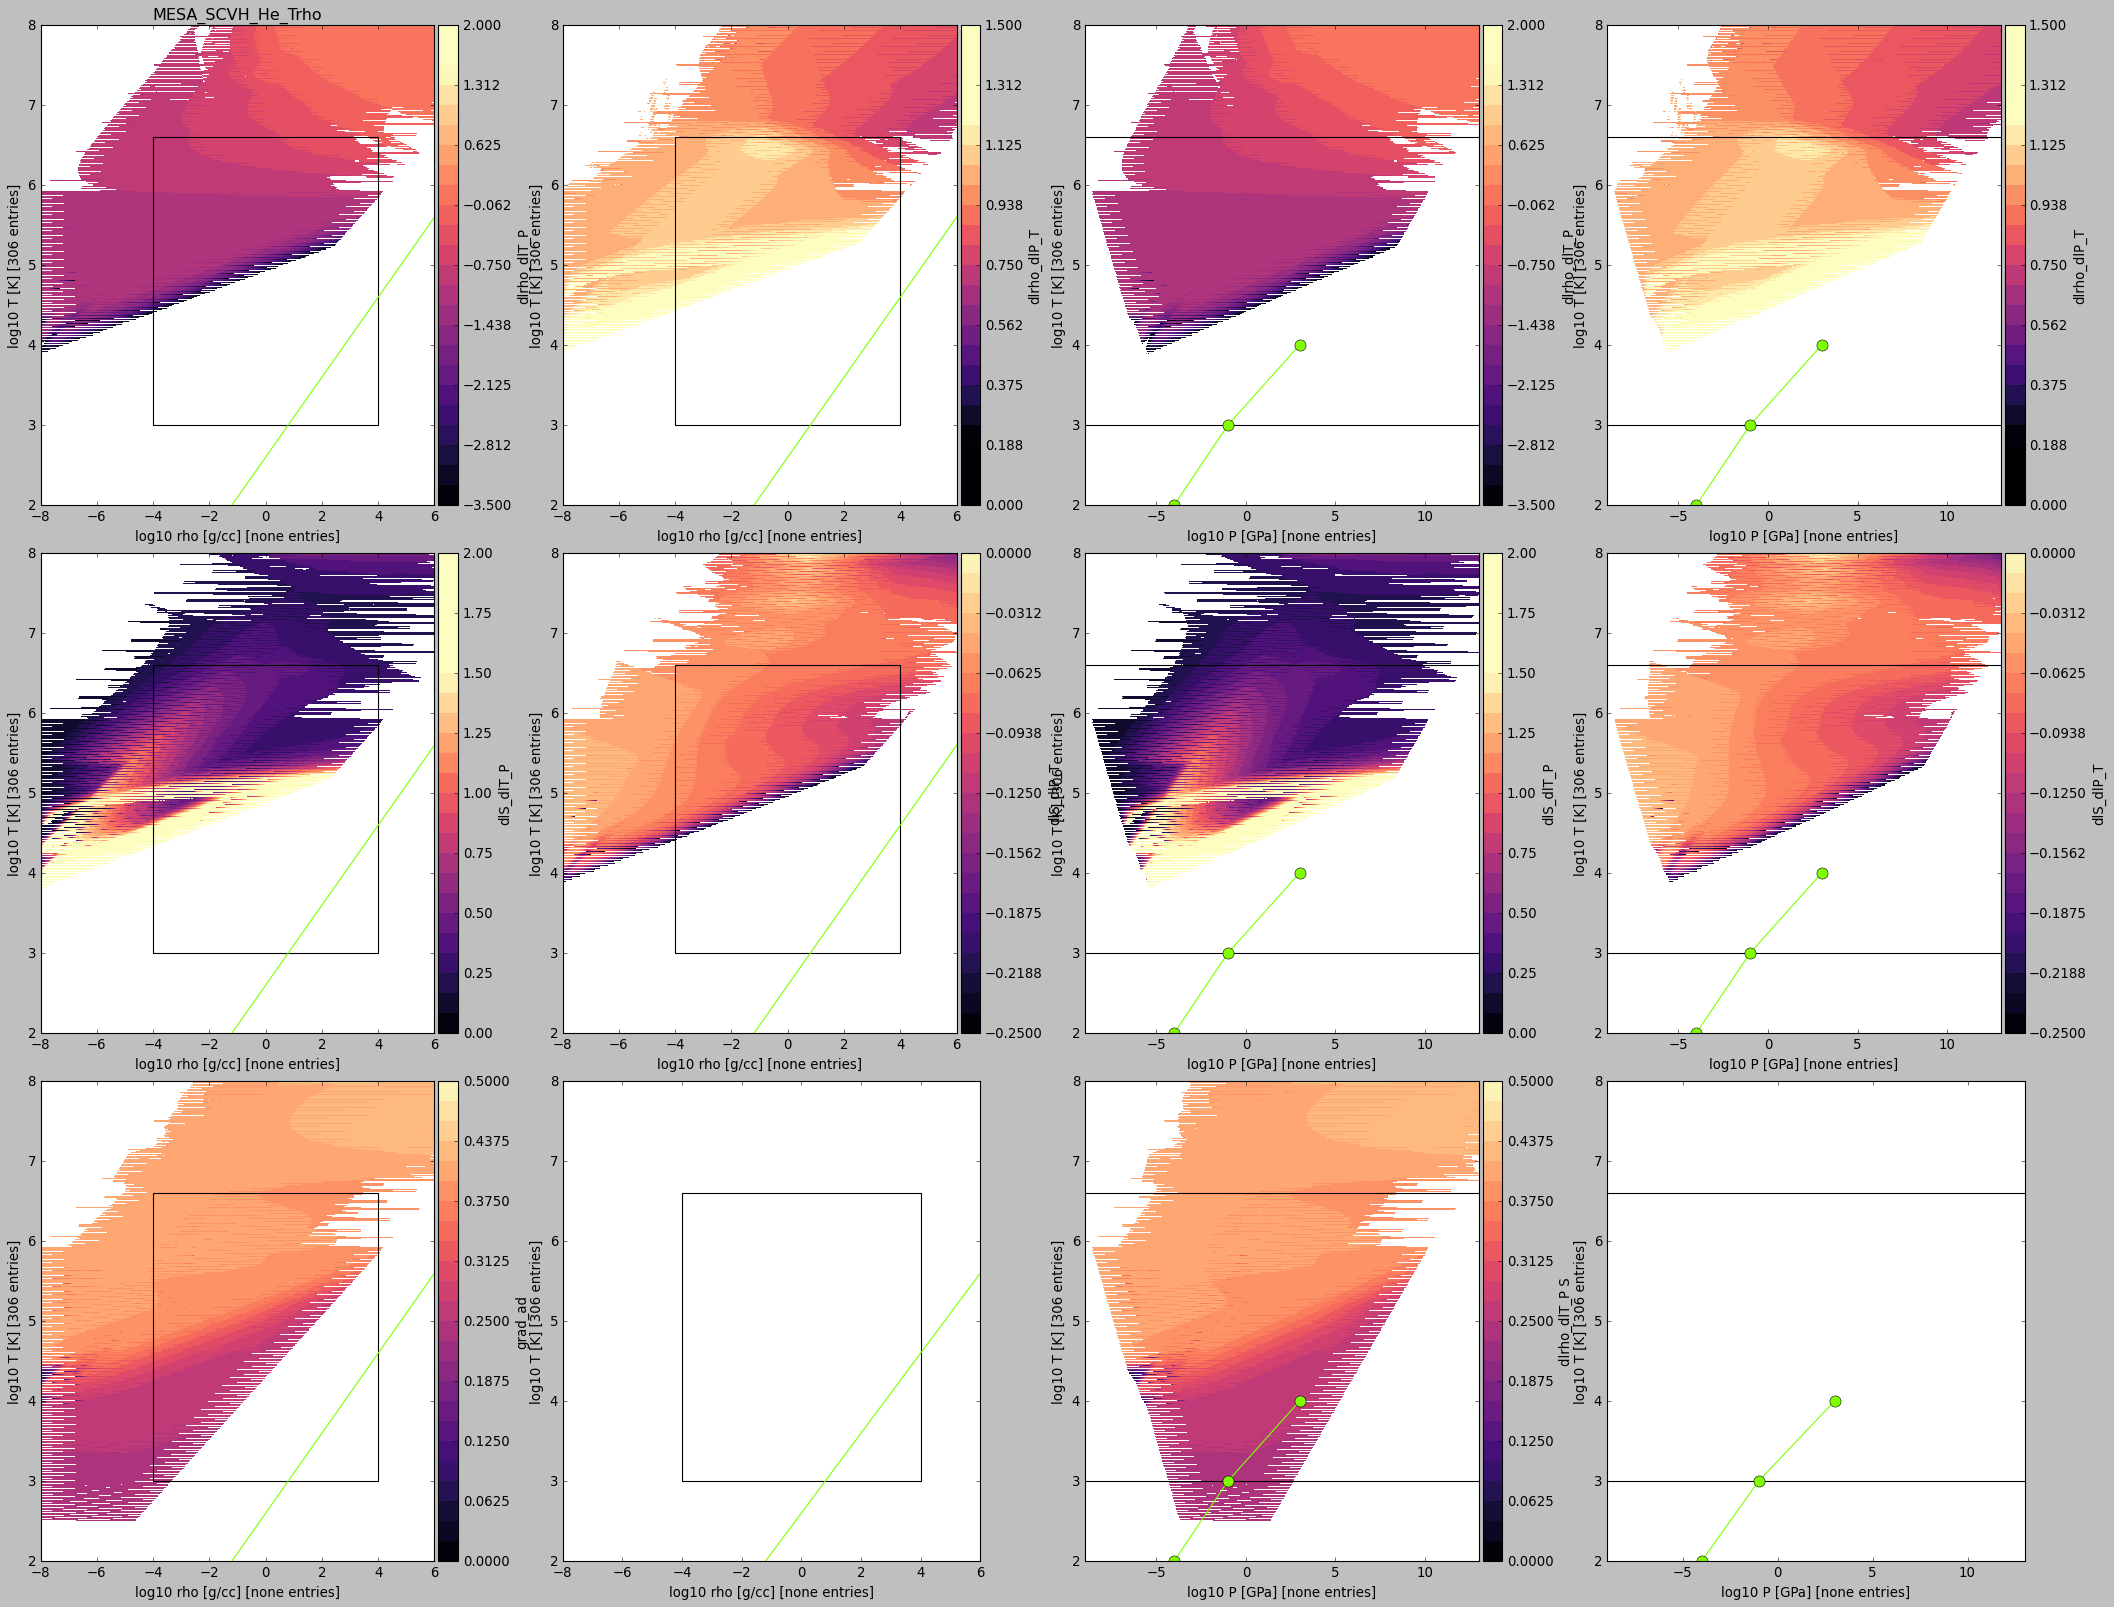

In [6]:
# make plots of S, P across grid first, just to make sure everything looks continuous

#tableNames = ['CMS19_H_Trho', 'CMS19_H_TP', 'CMS19_He_Trho', 'CMS19_He_TP', 'SCVH_H_TP', 'SCVH_He_TP', 'MESA_SCVH_H_Trho', 'MESA_SCVH_He_Trho','MESA_freeEOS_H_Trho','MESA_freeEOS_He_Trho']
#tables = [CMS19_H_Trho, CMS19_H_TP, CMS19_He_Trho, CMS19_He_TP, SCVH_H_TP, SCVH_He_TP, MESA_SCVH_H_Trho, MESA_SCVH_He_Trho, MESA_freeEOS_H_Trho, MESA_freeEOS_He_Trho]
tableNames = [ 'MESA_SCVH_H_Trho', 'MESA_SCVH_He_Trho','MESA_freeEOS_H_Trho','MESA_freeEOS_He_Trho']
tables = [MESA_SCVH_H_Trho, MESA_SCVH_He_Trho]


Slevels = np.linspace(-8., 6., 200)
Svmin = -2.
Svmax = 0.5

Plevels = np.linspace(-10.1, 20., 100)
Pvmin = -9.
Pvmax = 13.0

rholevels = np.linspace(-8.,6., 25)
rhovmin = -8.
rhovmax = 6.

# dlrho_dlT_P
col5levels = np.linspace(-3.5,2.,25)
col5vmin = -3.5
col5vmax = 1.5

# dlrho_dlP_T
col6levels = np.linspace(0.,1.5,25)
col6vmin = 0.2
col6vmax = 1.2

# dlS_dlT_P
col7levels = np.linspace(0.,2.,25)
col7vmin = 0.
col7vmax = 1.5

# dlS_dlP_T
col8levels = np.linspace(-0.25,0,25)
col8vmin = -0.25
col8vmax = 0

# grad_ad
col9levels = np.linspace(0.,0.5,25)
col9vmin = 0.
col9vmax = 0.5


for i, table in enumerate(tables):

    nT = len(table.independent_arr_1)
    
    if table.independent_var_2 == 'rho':
        nrho = len(table.independent_arr_2)
        nP = 'none'
    elif table.independent_var_2 == 'P':
        nP = len(table.independent_arr_2)
        nrho = 'none'
    else:
        nP = 'none'
        nrho = 'none'

    # masked arrays work a bit backwards--if mask == True, then that value is masked, i.e. set to np.nan
    allowedMask = ~meos.boundary_mask_rhoT(table) & ~meos.boundary_mask_PT(table)
    
    plot_rho = np.ma.array(table.log10rhogrid, mask=~allowedMask, fill_value = np.nan)
    plot_T = np.ma.array(table.log10Tgrid, mask=~allowedMask, fill_value = np.nan)
    plot_S = np.ma.array(table.log10Sgrid, mask=~allowedMask, fill_value = np.nan)
    plot_P = np.ma.array(table.log10Pgrid, mask=~allowedMask, fill_value = np.nan)
    
    fig, axes = plt.subplots(1,4,figsize=(32,8))
    
    
    divider0 = make_axes_locatable(axes[0])
    cax0 = divider0.append_axes('right', size='5%', pad=0.05)
    #cs0 = axes[0].contourf(table.log10rhogrid, table.log10Tgrid, table.log10Sgrid, levels=Slevels, cmap='magma',alpha=1,vmin=Svmin, vmax=Svmax)
    cs0 = axes[0].contourf(plot_rho, plot_T, plot_S, levels=Slevels, cmap='magma',alpha=1,vmin=Svmin, vmax=Svmax)
    fig.colorbar(cs0, cax=cax0, orientation='vertical',label='log10 S')
    axes[0].set_ylabel('log10 T [K] [{0} entries]'.format(nT))
    axes[0].set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
    
    divider1 = make_axes_locatable(axes[1])
    cax1 = divider1.append_axes('right', size='5%', pad=0.05)
    #cs1 = axes[1].contourf(table.log10rhogrid, table.log10Tgrid, table.log10Pgrid, levels=Plevels, cmap='magma',alpha=1, vmin=Pvmin, vmax=Pvmax)
    cs1 = axes[1].contourf(plot_rho, plot_T, plot_P, levels=Plevels, cmap='magma',alpha=1, vmin=Pvmin, vmax=Pvmax)
    fig.colorbar(cs1, cax=cax1, orientation='vertical',label='log10 P')
    
    divider2 = make_axes_locatable(axes[2])
    cax2 = divider2.append_axes('right', size='5%', pad=0.05)
    #cs2 = axes[2].contourf(table.log10Pgrid, table.log10Tgrid, table.log10Sgrid, levels=Slevels, cmap='magma',alpha=1,vmin=Svmin, vmax=Svmax)
    cs2 = axes[2].contourf(plot_P, plot_T, plot_S, levels=Slevels, cmap='magma',alpha=1,vmin=Svmin, vmax=Svmax)
    fig.colorbar(cs2, cax=cax2, orientation='vertical',label='log10 S')
    
    divider3 = make_axes_locatable(axes[3])
    cax3 = divider3.append_axes('right', size='5%', pad=0.05)
    #cs3 = axes[3].contourf(table.log10Pgrid, table.log10Tgrid, table.log10rhogrid, levels=rholevels, cmap='magma',alpha=1, vmin=rhovmin, vmax=rhovmax)
    cs3 = axes[3].contourf(plot_P, plot_T, plot_rho, levels=rholevels, cmap='magma',alpha=1, vmin=rhovmin, vmax=rhovmax)
    fig.colorbar(cs3, cax=cax3, orientation='vertical',label='log10 rho')    
    
    log10rho_ = np.linspace(-8,8,100)
    for ax in axes[0:2]:
        p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
        ax.add_patch(p)
        ax.set_xlim(-8,6)
        ax.set_ylim(2,8)
        # chabrier+2019 eq 3, limit of validity of EoS
        ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.Z) - (5./3)*np.log10(table.A), ls='-', color='#7FFF00')
        ax.set_xlim(-8.,6)
        ax.set_ylim(2.,8.)
        ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
        ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
    

    #log10P_ = np.linspace(-10., 13., 100)
    for ax in axes[2:]:
        ax.axhline(3.,color='k')
        ax.axhline(6.6,color='k')
        #ax.plot(log10P_, 2.7 + (1./4.)*log10P_ , ls='-', color='#7FFF00')
        #ax.plot(log10P_, 10. + log10P_ , ls='-', color='#7FFF00')
        ax.set_xlim(-9.,13.)
        ax.set_ylim(2.,8.)
        ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
        ax.set_xlabel('log10 P [GPa] [{0} entries]'.format(nP))
        ax.plot(np.array((-4,-1,3)), np.array((2,3,4)), marker='o', ms=10, color='#7FFF00',label='approx. Jupiter')
    

    axes[0].set_title("{0}".format(tableNames[i]))
    plt.subplots_adjust(hspace=0.1,wspace=0.25)
    #plt.show()
    plt.savefig("{0}.pdf".format(tableNames[i]),bbox_inches='tight')

for i, table in enumerate(tables):

    nT = len(table.independent_arr_1)
    
    if table.independent_var_2 == 'rho':
        nrho = len(table.independent_arr_2)
        nP = 'none'
    elif table.independent_var_2 == 'P':
        nP = len(table.independent_arr_2)
        nrho = 'none'

    # masked arrays work a bit backwards--if mask == True, then that value is masked, i.e. set to np.nan
    allowedMask = ~meos.boundary_mask_rhoT(table) & ~meos.boundary_mask_PT(table)
    
    plot_rho = np.ma.array(table.log10rhogrid, mask=~allowedMask, fill_value = np.nan)
    plot_T = np.ma.array(table.log10Tgrid, mask=~allowedMask, fill_value = np.nan)
    plot_S = np.ma.array(table.log10Sgrid, mask=~allowedMask, fill_value = np.nan)
    plot_P = np.ma.array(table.log10Pgrid, mask=~allowedMask, fill_value = np.nan)

    plot_col5 = np.ma.array(table.dlrho_dlT_P_grid, mask=~allowedMask, fill_value = np.nan)
    plot_col6 = np.ma.array(table.dlrho_dlP_T_grid, mask=~allowedMask, fill_value = np.nan)
    plot_col7 = np.ma.array(table.dlS_dlT_P_grid, mask=~allowedMask, fill_value = np.nan)
    plot_col8 = np.ma.array(table.dlS_dlP_T_grid, mask=~allowedMask, fill_value = np.nan)
    plot_col9 = np.ma.array(table.grad_ad_grid, mask=~allowedMask, fill_value = np.nan)
    
    fig, axes = plt.subplots(3,4,figsize=(32,24))
    
    
    divider00 = make_axes_locatable(axes[0,0])
    cax00 = divider00.append_axes('right', size='5%', pad=0.05)
    cs00 = axes[0,0].contourf(plot_rho, plot_T, plot_col5, levels=col5levels, cmap='magma',alpha=1,vmin=col5vmin, vmax=col5vmax)
    fig.colorbar(cs00, cax=cax00, orientation='vertical',label='dlrho_dlT_P')
    
    divider01 = make_axes_locatable(axes[0,1])
    cax01 = divider01.append_axes('right', size='5%', pad=0.05)
    cs01 = axes[0,1].contourf(plot_rho, plot_T, plot_col6, levels=col6levels, cmap='magma',alpha=1, vmin=col6vmin, vmax=col6vmax)
    fig.colorbar(cs01, cax=cax01, orientation='vertical',label='dlrho_dlP_T')
    
    divider02 = make_axes_locatable(axes[0,2])
    cax02 = divider02.append_axes('right', size='5%', pad=0.05)
    cs02 = axes[0,2].contourf(plot_P, plot_T, plot_col5, levels=col5levels, cmap='magma',alpha=1,vmin=col5vmin, vmax=col5vmax)
    fig.colorbar(cs02, cax=cax02, orientation='vertical',label='dlrho_dlT_P')
    
    divider03 = make_axes_locatable(axes[0,3])
    cax03 = divider03.append_axes('right', size='5%', pad=0.05)
    cs03 = axes[0,3].contourf(plot_P, plot_T, plot_col6, levels=col6levels, cmap='magma',alpha=1, vmin=col6vmin, vmax=col6vmax)
    fig.colorbar(cs03, cax=cax03, orientation='vertical',label='dlrho_dlP_T')    



    divider10 = make_axes_locatable(axes[1,0])
    cax10 = divider10.append_axes('right', size='5%', pad=0.05)
    cs10 = axes[1,0].contourf(plot_rho, plot_T, plot_col7, levels=col7levels, cmap='magma',alpha=1,vmin=col7vmin, vmax=col7vmax)
    fig.colorbar(cs10, cax=cax10, orientation='vertical',label='dlS_dlT_P')
    
    divider11 = make_axes_locatable(axes[1,1])
    cax11 = divider11.append_axes('right', size='5%', pad=0.05)
    cs11 = axes[1,1].contourf(plot_rho, plot_T, plot_col8, levels=col8levels, cmap='magma',alpha=1, vmin=col8vmin, vmax=col8vmax)
    fig.colorbar(cs11, cax=cax11, orientation='vertical',label='dlS_dlP_T')
    
    divider12 = make_axes_locatable(axes[1,2])
    cax12 = divider12.append_axes('right', size='5%', pad=0.05)
    cs12 = axes[1,2].contourf(plot_P, plot_T, plot_col7, levels=col7levels, cmap='magma',alpha=1,vmin=col7vmin, vmax=col7vmax)
    fig.colorbar(cs12, cax=cax12, orientation='vertical',label='dlS_dlT_P')
    
    divider13 = make_axes_locatable(axes[1,3])
    cax13 = divider13.append_axes('right', size='5%', pad=0.05)
    cs13 = axes[1,3].contourf(plot_P, plot_T, plot_col8, levels=col8levels, cmap='magma',alpha=1, vmin=col8vmin, vmax=col8vmax)
    fig.colorbar(cs13, cax=cax13, orientation='vertical',label='dlS_dlP_T')   


    divider20 = make_axes_locatable(axes[2,0])
    cax20 = divider20.append_axes('right', size='5%', pad=0.05)
    cs20 = axes[2,0].contourf(plot_rho, plot_T, plot_col9, levels=col9levels, cmap='magma',alpha=1,vmin=col9vmin, vmax=col9vmax)
    fig.colorbar(cs20, cax=cax20, orientation='vertical',label='grad_ad')
    
    divider22 = make_axes_locatable(axes[2,2])
    cax22 = divider22.append_axes('right', size='5%', pad=0.05)
    cs22 = axes[2,2].contourf(plot_P, plot_T, plot_col9, levels=col9levels, cmap='magma',alpha=1,vmin=col9vmin, vmax=col9vmax)
    fig.colorbar(cs22, cax=cax22, orientation='vertical',label='dlrho_dlT_P S')
    
    log10rho_ = np.linspace(-8,8,100)
    for ax in [axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1]]:
        p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
        ax.add_patch(p)
        ax.set_xlim(-8,6)
        ax.set_ylim(2,8)
        # chabrier+2019 eq 3, limit of validity of EoS
        ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.Z) - (5./3)*np.log10(table.A), ls='-', color='#7FFF00')
        ax.set_xlim(-8.,6)
        ax.set_ylim(2.,8.)
        ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
        ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
    

    #log10P_ = np.linspace(-10., 13., 100)
    for ax in [axes[0,2], axes[0,3], axes[1,2], axes[1,3], axes[2,2], axes[2,3]]:
        ax.axhline(3.,color='k')
        ax.axhline(6.6,color='k')
        #ax.plot(log10P_, 2.7 + (1./4.)*log10P_ , ls='-', color='#7FFF00')
        #ax.plot(log10P_, 10. + log10P_ , ls='-', color='#7FFF00')
        ax.set_xlim(-9.,13.)
        ax.set_ylim(2.,8.)
        ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
        ax.set_xlabel('log10 P [GPa] [{0} entries]'.format(nP))
        ax.plot(np.array((-4,-1,3)), np.array((2,3,4)), marker='o', ms=10, color='#7FFF00',label='approx. Jupiter')
    

    axes[0,0].set_title("{0}".format(tableNames[i]))
    plt.subplots_adjust(hspace=0.1,wspace=0.25)
    #plt.show()
    plt.savefig("{0}_cols5-9.pdf".format(tableNames[i]),bbox_inches='tight')


#ignore everything below the green line!!

In [7]:
# we want to calculate, from grid dimensions T [:,0] and rho [:,2] and tabulated S  [:,4] and P [:,1] only,
# the four finite difference quantities from Sunny's notes
# dlnP_dlnrho_T
# dlnP_dlnT_rho
# dlnS_dlnrho_T
# dlnS_dlnT_rho

# log10T is constant along each column of log10Sgrid, log10Pgrid (along each column, log10rho takes 281 values)
# log10rho is constant along each row of log10Sgrid, log10Pgrid (along each row, log10T takes 121 values)

In [ ]:
#for i, table in enumerate([H_TP, He_TP]):
for i, table in enumerate(tables):

    nT = len(table.independent_arr_1)
    
    if table.independent_var_2 == 'rho':
        nrho = len(table.independent_arr_2)
        nP = 'none'
    elif table.independent_var_2 == 'P':
        nP = len(table.independent_arr_2)
        nrho = 'none'

    fd1, fd3 = meos.finite_difference_dlrho_T(table)
    fd2, fd4 = meos.finite_difference_dlT_rho(table)

    c5 = -fd2/fd1
    c6 = 1./fd1
    c7 = fd4 - ((fd2/fd1)*fd3)
    c8 = fd3/fd1
    c9 = -fd3/((fd1*fd4) - (fd2*fd3))

    # masked arrays work a bit backwards--if mask == True, then that value is masked, i.e. set to np.nan
    allowedMask = ~meos.boundary_mask_rhoT(table) & ~meos.boundary_mask_PT(table)
    
    plot_rho = np.ma.array(table.log10rhogrid, mask=~allowedMask, fill_value = np.nan)
    plot_T = np.ma.array(table.log10Tgrid, mask=~allowedMask, fill_value = np.nan)
    plot_S = np.ma.array(table.log10Sgrid, mask=~allowedMask, fill_value = np.nan)
    plot_P = np.ma.array(table.log10Pgrid, mask=~allowedMask, fill_value = np.nan)

    # original table values
    plot_col5 = np.ma.array(table.dlrho_dlT_P_grid, mask=~allowedMask, fill_value = np.nan)
    plot_col6 = np.ma.array(table.dlrho_dlP_T_grid, mask=~allowedMask, fill_value = np.nan)
    plot_col7 = np.ma.array(table.dlS_dlT_P_grid, mask=~allowedMask, fill_value = np.nan)
    plot_col8 = np.ma.array(table.dlS_dlP_T_grid, mask=~allowedMask, fill_value = np.nan)
    plot_col9 = np.ma.array(table.grad_ad_grid, mask=~allowedMask, fill_value = np.nan)

    # values calculated via finite difference of T, rho
    plot_c5 = np.ma.array(c5, mask=~allowedMask, fill_value = np.nan)
    plot_c6 = np.ma.array(c6, mask=~allowedMask, fill_value = np.nan)
    plot_c7 = np.ma.array(c7, mask=~allowedMask, fill_value = np.nan)
    plot_c8 = np.ma.array(c8, mask=~allowedMask, fill_value = np.nan)
    plot_c9 = np.ma.array(c9, mask=~allowedMask, fill_value = np.nan)
    
    fig, axes = plt.subplots(3,5,figsize=(30,15))
    
    
    divider00 = make_axes_locatable(axes[0,0])
    cax00 = divider00.append_axes('right', size='5%', pad=0.05)
    cs00 = axes[0,0].contourf(plot_rho, plot_T, plot_col5, levels=col5levels, cmap='magma',alpha=1,vmin=col5vmin, vmax=col5vmax)
    fig.colorbar(cs00, cax=cax00, orientation='vertical',label='col5 = dlrho_dlT_P')
    
    divider01 = make_axes_locatable(axes[0,1])
    cax01 = divider01.append_axes('right', size='5%', pad=0.05)
    cs01 = axes[0,1].contourf(plot_rho, plot_T, plot_col6, levels=col6levels, cmap='magma',alpha=1, vmin=col6vmin, vmax=col6vmax)
    fig.colorbar(cs01, cax=cax01, orientation='vertical',label='col6 = dlrho_dlP_T')
    
    divider02 = make_axes_locatable(axes[0,2])
    cax02 = divider02.append_axes('right', size='5%', pad=0.05)
    cs02 = axes[0,2].contourf(plot_rho, plot_T, plot_col7, levels=col7levels, cmap='magma',alpha=1,vmin=col7vmin, vmax=col7vmax)
    fig.colorbar(cs02, cax=cax02, orientation='vertical',label='col7 = dlS_dlT_P')
    
    divider03 = make_axes_locatable(axes[0,3])
    cax03 = divider03.append_axes('right', size='5%', pad=0.05)
    cs03 = axes[0,3].contourf(plot_rho, plot_T, plot_col8, levels=col8levels, cmap='magma',alpha=1,vmin=col8vmin, vmax=col8vmax)
    fig.colorbar(cs03, cax=cax03, orientation='vertical',label='col8 = dlS_dlP_T')    

    divider04 = make_axes_locatable(axes[0,4])
    cax04 = divider04.append_axes('right', size='5%', pad=0.05)
    cs04 = axes[0,4].contourf(plot_rho, plot_T, plot_col9, levels=col9levels, cmap='magma',alpha=1,vmin=col9vmin, vmax=col9vmax)
    fig.colorbar(cs04, cax=cax04, orientation='vertical',label='col9 = grad_ad')    


    divider10 = make_axes_locatable(axes[1,0])
    cax10 = divider10.append_axes('right', size='5%', pad=0.05)
    cs10 = axes[1,0].contourf(plot_rho, plot_T, plot_c5, levels=col5levels, cmap='magma',alpha=1,vmin=col5vmin, vmax=col5vmax)
    fig.colorbar(cs10, cax=cax10, orientation='vertical',label='fd col5 = dlrho_dlT_P')
    
    divider11 = make_axes_locatable(axes[1,1])
    cax11 = divider11.append_axes('right', size='5%', pad=0.05)
    cs11 = axes[1,1].contourf(plot_rho, plot_T, plot_c6, levels=col6levels, cmap='magma',alpha=1, vmin=col6vmin, vmax=col6vmax)
    fig.colorbar(cs11, cax=cax11, orientation='vertical',label='fd col6 = dlrho_dlP_T')
    
    divider12 = make_axes_locatable(axes[1,2])
    cax12 = divider12.append_axes('right', size='5%', pad=0.05)
    cs12 = axes[1,2].contourf(plot_rho, plot_T, plot_c7, levels=col7levels, cmap='magma',alpha=1,vmin=col7vmin, vmax=col7vmax)
    fig.colorbar(cs12, cax=cax12, orientation='vertical',label='fd col7 = dlS_dlT_P')
    
    divider13 = make_axes_locatable(axes[1,3])
    cax13 = divider13.append_axes('right', size='5%', pad=0.05)
    cs13 = axes[1,3].contourf(plot_rho, plot_T, plot_c8, levels=col8levels, cmap='magma',alpha=1, vmin=col8vmin, vmax=col8vmax)
    fig.colorbar(cs13, cax=cax13, orientation='vertical',label='fd col8 = dlS_dlP_T')   

    divider14 = make_axes_locatable(axes[1,4])
    cax14 = divider14.append_axes('right', size='5%', pad=0.05)
    cs14 = axes[1,4].contourf(plot_rho, plot_T, plot_c9, levels=col9levels, cmap='magma',alpha=1, vmin=col9vmin, vmax=col9vmax)
    fig.colorbar(cs14, cax=cax14, orientation='vertical',label='fd col9 = grad_ad')   


    diffvmin = -5
    diffvmax = 1
    difflevels = np.linspace(diffvmin,diffvmax,7)
    

    divider20 = make_axes_locatable(axes[2,0])
    cax20 = divider20.append_axes('right', size='5%', pad=0.05)
    cs20 = axes[2,0].contourf(plot_rho, plot_T, np.log10(np.abs((plot_c5 - plot_col5)/plot_col5)), levels=difflevels, cmap='plasma',alpha=1,vmin=diffvmin, vmax=diffvmax)
    fig.colorbar(cs20, cax=cax20, orientation='vertical',label='rel diff dlrho_dlT_P')
    
    divider21 = make_axes_locatable(axes[2,1])
    cax21 = divider21.append_axes('right', size='5%', pad=0.05)
    cs21 = axes[2,1].contourf(plot_rho, plot_T, np.log10(np.abs((plot_c6 - plot_col6)/plot_col6)), levels=difflevels, cmap='plasma',alpha=1,vmin=diffvmin, vmax=diffvmax)
    fig.colorbar(cs21, cax=cax21, orientation='vertical',label='rel diff dlrho_dlP_T')
    
    divider22 = make_axes_locatable(axes[2,2])
    cax22 = divider22.append_axes('right', size='5%', pad=0.05)
    cs22 = axes[2,2].contourf(plot_rho, plot_T, np.log10(np.abs((plot_c7 - plot_col7)/plot_col7)), levels=difflevels, cmap='plasma',alpha=1,vmin=diffvmin, vmax=diffvmax)
    fig.colorbar(cs22, cax=cax22, orientation='vertical',label='rel diff dlS_dlT_P')
    
    divider23 = make_axes_locatable(axes[2,3])
    cax23 = divider23.append_axes('right', size='5%', pad=0.05)
    cs23 = axes[2,3].contourf(plot_rho, plot_T, np.log10(np.abs((plot_c8 - plot_col8)/plot_col8)), levels=difflevels, cmap='plasma',alpha=1,vmin=diffvmin, vmax=diffvmax)
    fig.colorbar(cs23, cax=cax23, orientation='vertical',label='rel diff dlS_dlP_T')   

    divider24 = make_axes_locatable(axes[2,4])
    cax24 = divider24.append_axes('right', size='5%', pad=0.05)
    cs24 = axes[2,4].contourf(plot_rho, plot_T, np.log10(np.abs((plot_c9 - plot_col9)/plot_col9)), levels=difflevels, cmap='plasma',alpha=1,vmin=diffvmin, vmax=diffvmax)
    fig.colorbar(cs24, cax=cax24, orientation='vertical',label='rel diff grad_ad')   


    log10rho_ = np.linspace(-8,8,100)
    for ax in np.ravel(axes):
        #p = plt.Rectangle((-4,3),8,3.6,fill=False,color='k')
        #ax.add_patch(p)

        # chabrier+2019 eq 3, limit of validity of EoS
        ax.plot(log10rho_, 3.3 + (1./2.)*log10rho_ + np.log10(table.Z) - (5./3)*np.log10(table.A), ls='-', color='#7FFF00')
        #ax.set_xlim(-8.,6)
        #ax.set_ylim(2.,8.)
        ax.set_xlim(-4,4.)
        ax.set_ylim(3.,6.6)
        ax.set_ylabel('log10 T [K] [{0} entries]'.format(nT))
        ax.set_xlabel('log10 rho [g/cc] [{0} entries]'.format(nrho))
    

    axes[0,0].set_title("{0}".format(tableNames[i]))
    plt.subplots_adjust(hspace=0.1,wspace=0.5)
    #plt.show()
    plt.savefig("{0}_finitediff_comparison.pdf".format(tableNames[i]),bbox_inches='tight')


#ignore everything below the green line!!

[[ 500.1035 -282.1035 -167.     ... -250.825  -282.212  -282.212 ]
 [ 502.103  -282.103  -169.     ... -250.257  -281.994  -281.994 ]
 [ 504.1035 -282.1035 -171.     ... -249.6895 -281.7795 -281.7795]
 ...
 [-282.1035 -161.      603.6035 ... -282.8915  682.6635  682.6635]
 [-282.1035 -163.      605.6035 ... -282.66    681.804   681.804 ]
 [-282.103  -165.      607.603  ... -282.434   680.9525  680.9525]]


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_18502/2996251300.py:122: RuntimeWarning: divide by zero encountered in log10
  cs23 = axes[2,3].contourf(plot_rho, plot_T, np.log10(np.abs((plot_c8 - plot_col8)/plot_col8)), levels=difflevels, cmap='plasma',alpha=1,vmin=diffvmin, vmax=diffvmax)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_18502/2996251300.py:127: RuntimeWarning: divide by zero encountered in log10
  cs24 = axes[2,4].contourf(plot_rho, plot_T, np.log10(np.abs((plot_c9 - plot_col9)/plot_col9)), levels=difflevels, cmap='plasma',alpha=1,vmin=diffvmin, vmax=diffvmax)


[[ 493.8565 -275.8565 -167.     ... -255.3125 -288.5245 -288.5245]
 [ 495.8565 -275.8565 -169.     ... -254.7405 -288.191  -288.191 ]
 [ 497.8565 -275.8565 -171.     ... -254.1665 -287.84   -287.84  ]
 ...
 [-275.8565 -161.      597.3565 ... -289.324   694.0655  694.0655]
 [-275.8565 -163.      599.3565 ... -289.1035  693.1895  693.1895]
 [-275.8565 -165.      601.3565 ... -288.8325  692.266   692.266 ]]


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_18502/2996251300.py:122: RuntimeWarning: divide by zero encountered in log10
  cs23 = axes[2,3].contourf(plot_rho, plot_T, np.log10(np.abs((plot_c8 - plot_col8)/plot_col8)), levels=difflevels, cmap='plasma',alpha=1,vmin=diffvmin, vmax=diffvmax)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_18502/2996251300.py:127: RuntimeWarning: divide by zero encountered in log10
  cs24 = axes[2,4].contourf(plot_rho, plot_T, np.log10(np.abs((plot_c9 - plot_col9)/plot_col9)), levels=difflevels, cmap='plasma',alpha=1,vmin=diffvmin, vmax=diffvmax)
